In [1]:
import pandas as pd
df = pd.read_csv("teacher_preds.csv")
df.shape

(6, 18145)

In [2]:
df

,runs2\00495\.fullpic\0000000031+system.png,runs2\00232\.fullpic\0000000017+system.png,runs2\00222\.fullpic\0000000021+system.png,runs2\00155\.fullpic\0000000059+system.png,runs2\00213\.fullpic\0000000050+system.png,runs2\00188\.fullpic\0000000000+system.png,runs2\00038\.fullpic\0000000018+system.png,runs2\00325\.fullpic\0000000020+system.png,runs2\00542\.fullpic\0000000005+system.png,runs2\00382\.fullpic\0000000019+system.png,...,runs2\00522\.fullpic\0000000006+system.png,runs2\00105\.fullpic\0000000023+system.png,runs2\00137\.fullpic\0000000000+system.png,runs2\00535\.fullpic\0000000004+system.png,runs2\00474\.fullpic\0000000035+system.png,runs2\00135\.fullpic\0000000000+system.png,runs2\00084\.fullpic\0000000008+system.png,runs2\00427\.fullpic\0000000010+system.png,runs2\00005\.fullpic\0000000017+system.png,runs2\00318\.fullpic\0000000012+system.png
0,0.994036,0.252415,0.125443,0.780302,0.995703,0.978584,0.515961,0.986185,0.886525,0.283373,...,0.974987,0.634679,0.033257,0.184055,0.847569,0.027488,0.915319,0.893121,0.276775,0.093170
1,0.950074,0.296216,0.089619,0.740430,0.993643,0.947024,0.435184,0.086640,0.089532,0.552531,...,0.995223,0.673361,0.062697,0.178073,0.353673,0.079575,0.951066,0.973675,0.100052,0.049644
2,0.967965,0.316424,0.494834,0.924941,0.986860,0.085413,0.454735,0.706404,0.264611,0.809745,...,0.990736,0.177209,0.018420,0.110220,0.590207,0.125631,0.880065,0.111686,0.714543,0.093717
3,0.993570,0.305030,0.243020,0.341259,0.973259,0.031875,0.603021,0.996628,0.958447,0.601855,...,0.990801,0.553592,0.157736,0.041987,0.751001,0.036173,0.346058,0.389065,0.799681,0.249036
4,0.996429,0.549720,0.247151,0.221392,0.995979,0.148924,0.953024,0.999930,0.404102,0.206099,...,0.999667,0.946926,0.034710,0.019585,0.856682,0.030527,0.609682,0.367823,0.099187,0.325224
5,0.996768,0.301210,0.496556,0.891345,0.996756,0.481564,0.266685,0.189810,0.999709,0.434318,...,0.999530,0.331455,0.043686,0.117695,0.761554,0.066866,0.875869,0.032245,0.076577,0.265497


Lets check to see if there is actually danger ar argmax of these predictions

In [3]:
import numpy as np
amx = pd.DataFrame([np.argmax(df.to_numpy(),0)], columns=df.columns)
amx.shape

(1, 18145)

In [4]:
amx

,runs2\00495\.fullpic\0000000031+system.png,runs2\00232\.fullpic\0000000017+system.png,runs2\00222\.fullpic\0000000021+system.png,runs2\00155\.fullpic\0000000059+system.png,runs2\00213\.fullpic\0000000050+system.png,runs2\00188\.fullpic\0000000000+system.png,runs2\00038\.fullpic\0000000018+system.png,runs2\00325\.fullpic\0000000020+system.png,runs2\00542\.fullpic\0000000005+system.png,runs2\00382\.fullpic\0000000019+system.png,...,runs2\00522\.fullpic\0000000006+system.png,runs2\00105\.fullpic\0000000023+system.png,runs2\00137\.fullpic\0000000000+system.png,runs2\00535\.fullpic\0000000004+system.png,runs2\00474\.fullpic\0000000035+system.png,runs2\00135\.fullpic\0000000000+system.png,runs2\00084\.fullpic\0000000008+system.png,runs2\00427\.fullpic\0000000010+system.png,runs2\00005\.fullpic\0000000017+system.png,runs2\00318\.fullpic\0000000012+system.png
0,5,4,5,2,5,0,4,4,5,2,...,4,4,3,0,4,2,1,1,3,4


In [5]:
n = 6
angles = [360/n*i for i in range(n)]
radians = [a/180*np.pi for a in angles]
vectors = [np.array([round(np.cos(r),5), round(np.sin(r),5)]) for r in radians]
vectors

[array([1., 0.]),
 array([0.5    , 0.86603]),
 array([-0.5    ,  0.86603]),
 array([-1.,  0.]),
 array([-0.5    , -0.86603]),
 array([ 0.5    , -0.86603])]

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from PIL import Image
from itertools import *
%matplotlib qt
f = np.random.choice(amx.columns)
def draw_pred(f):
    plt.axis('off')
    modded = []
    im = Image.open(f)
    modded.append(plt.imshow(im))
    preds = df[f]
    preds = np.array([p*v for p,v in zip(preds,vectors)])*0.25
    origin = im.size
    origin = [i/2 for i in origin]
    modded.extend([plt.arrow(*origin, *p*origin[1], width=10, color='r') for p in preds])
    modded.append(plt.text(origin[0], 10, f, size='xx-large', va='top', ha='center'))
    return modded

def animate_preds(files):
    anime = ani.FuncAnimation(
        plt.gcf(),
        draw_pred,
        files,
        blit=True
    )
    plt.get_current_fig_manager().full_screen_toggle()
    plt.show()


start = np.random.randint(0, len(amx.columns))
files = islice(cycle(sorted(amx.columns)), start, start+len(amx.columns))
animate_preds(files)

C:\Users\rahul\AppData\Local\Temp\ipykernel_21076\2031018713.py:21: UserWarning: frames=<itertools.islice object at 0x00000159E2745D50> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anime = ani.FuncAnimation(


Takeaways from this visualization
- Some times all directions are marked dangerous
- Some times all directions are marked not dangerous
- Some times there's variation in how dangerous each direction is

If knowledge from the ensemble is going to get distilled into a student model, I think the student needs to be shown example of where there is a large variation within the danger predictions

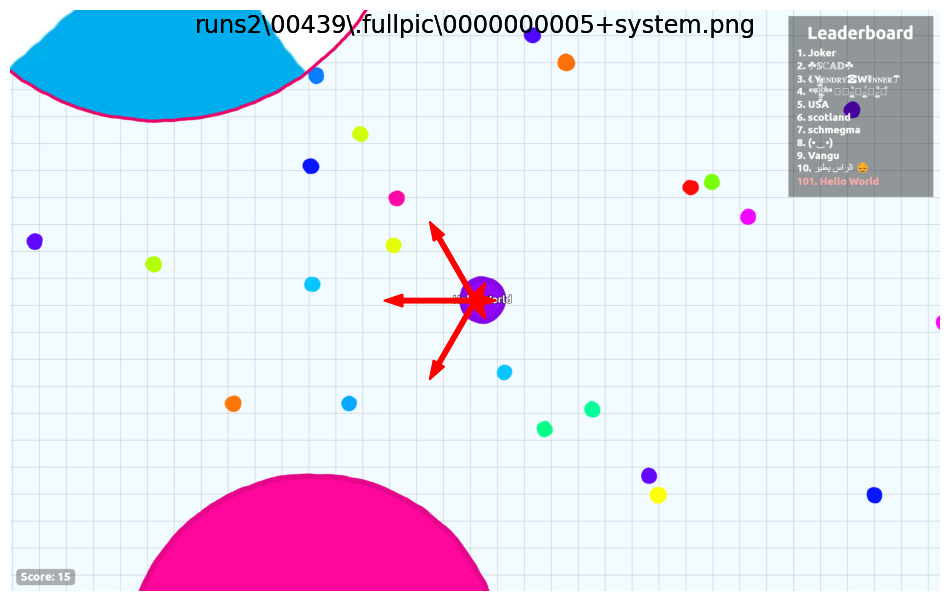

In [42]:
%matplotlib inline
descending_variations = df.var().sort_values(ascending=False)
plt.figure(figsize=(12,8))
animate_preds(descending_variations.index)

In [9]:
%matplotlib inline
plt.plot(range(len(descending_variations)), descending_variations.to_numpy())

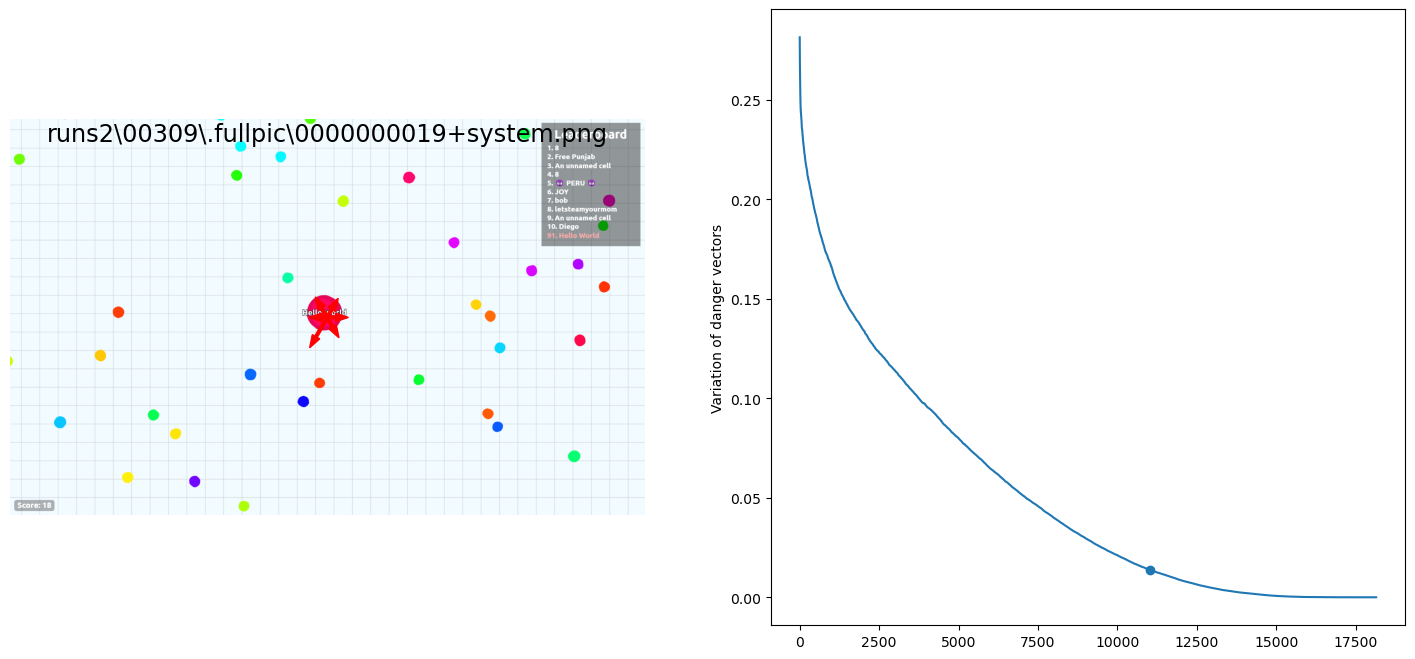

In [109]:
%matplotlib inline
def prep_var_demo():
    plt.subplots(1,2,figsize=(18,8))
    plt.subplot(122)
    plt.plot(range(len(descending_variations)), descending_variations.to_numpy())
    plt.ylabel("Variation of danger vectors")
def draw_var_demo(i):
    plt.subplot(121)
    modded = []
    modded.extend(draw_pred(descending_variations.index.to_numpy()[i]))
    plt.subplot(122)
    modded.append(plt.scatter([i],descending_variations.iloc[i]))
    return modded
prep_var_demo()
draw_var_demo(11011)
None

In [65]:
%matplotlib qt
plt.subplots(1,2,figsize=(18,8))
plt.subplot(122)
plt.plot(range(len(descending_variations)), descending_variations.to_numpy())
anime = ani.FuncAnimation(
    plt.gcf(),
    draw_var_demo,
    range(0, len(descending_variations), len(descending_variations)//100),
    blit=True,
    interval=500
)
plt.show()

Lets train a model on the N most varying predictions

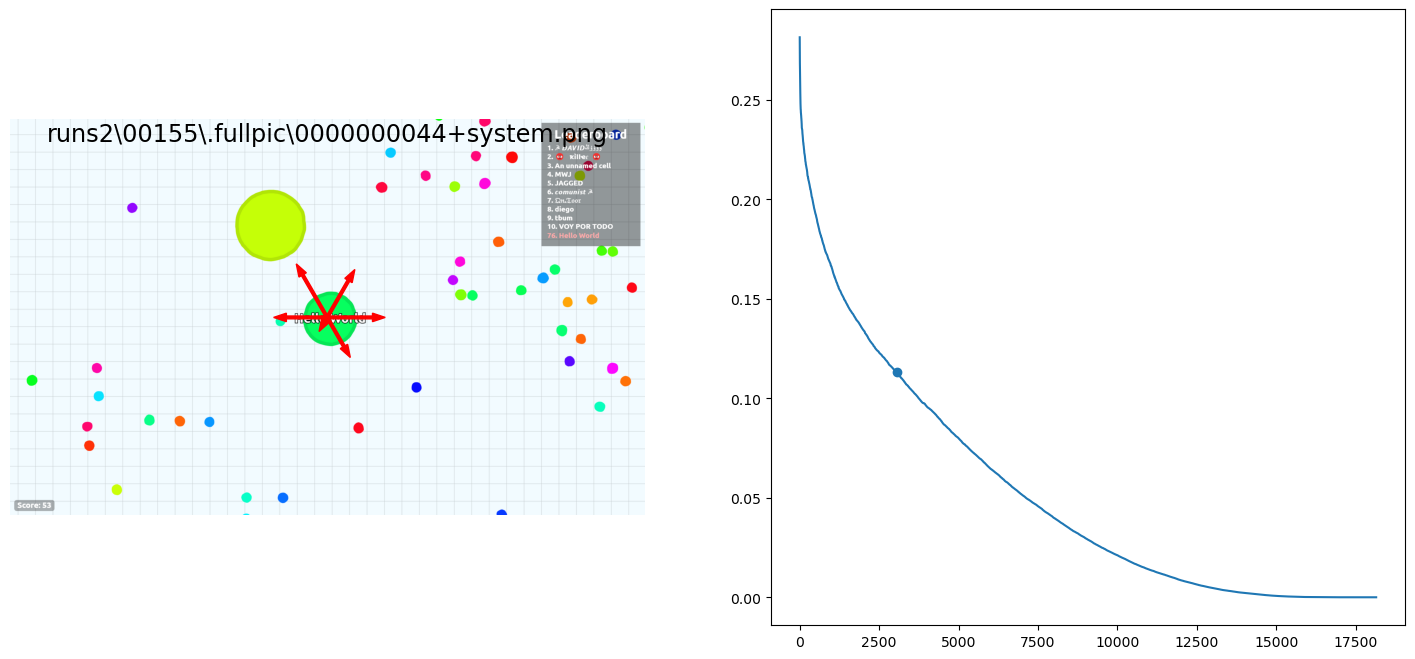

In [244]:
prep_var_demo()
draw_var_demo(3050)
None

In [245]:
N = 3000
samples = df[descending_variations.index.to_numpy()[:N]]
samples.shape

(6, 3000)

In [247]:
np.unique(np.argmax(samples.to_numpy(),0), return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([506, 471, 499, 542, 461, 521], dtype=int64))

In [256]:
import tensorflow as tf
class MyDropOutLayer(tf.keras.layers.Dropout):
    "Makes it so that drop out is always active"
    def call(self, inputs, training=None):
        return super().call(inputs, True)



model = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(10, 5, input_shape=(200,320,3), activation='relu'),
    tf.keras.layers.MaxPool2D(5),
    tf.keras.layers.Flatten(),
    MyDropOutLayer(0.1),
    tf.keras.layers.Dense(100, 'relu'),
    MyDropOutLayer(0.1),
    tf.keras.layers.Dense(6, 'sigmoid'),
])

In [249]:
model(np.random.random((1,200,320,3)))

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.22710668, 0.3614051 , 0.45787513, 0.55414486, 0.5737542 ,
        0.32960615]], dtype=float32)>

In [250]:
from tqdm.notebook import tqdm
x = np.array([np.asarray(Image.open(f).resize((320,200))) for f in tqdm(samples.columns)])/255
y = samples.to_numpy().T
x.shape, y.shape

  0%|          | 0/3000 [00:00<?, ?it/s]

((3000, 200, 320, 3), (3000, 6))

In [251]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2)
for i in [train_x, val_x, train_y, val_y]:
    print(i.shape)

(2400, 200, 320, 3)
(600, 200, 320, 3)
(2400, 6)
(600, 6)


In [258]:
model.compile('adam',
              tf.keras.losses.BinaryCrossentropy(),
              jit_compile=True)
callback = tf.keras.callbacks.EarlyStopping('val_loss', 0.005, 3)

In [259]:
hist2 = model.fit(
    train_x,
    train_y,
    32,
    10,
    validation_data=(val_x, val_y),
    callbacks=callback
)

Epoch 1/10
75/75 [==============================] - 44s 547ms/step - loss: 0.7400 - val_loss: 0.5692
Epoch 2/10
75/75 [==============================] - 38s 503ms/step - loss: 0.5153 - val_loss: 0.5181
Epoch 3/10
75/75 [==============================] - 37s 493ms/step - loss: 0.4521 - val_loss: 0.5061
Epoch 4/10
75/75 [==============================] - 37s 493ms/step - loss: 0.4124 - val_loss: 0.4980
Epoch 5/10
75/75 [==============================] - 38s 500ms/step - loss: 0.3843 - val_loss: 0.5000
Epoch 6/10
75/75 [==============================] - 37s 491ms/step - loss: 0.3692 - val_loss: 0.4975
Epoch 7/10
75/75 [==============================] - 37s 493ms/step - loss: 0.3585 - val_loss: 0.4920
Epoch 8/10
75/75 [==============================] - 38s 505ms/step - loss: 0.3524 - val_loss: 0.4948
Epoch 9/10
75/75 [==============================] - 38s 511ms/step - loss: 0.3487 - val_loss: 0.4990
Epoch 10/10
75/75 [==============================] - 37s 494ms/step - loss: 0.3451 - val_lo

d:\Projects\Agar.io\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\Agar.io\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\Agar.io\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\Agar.io\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

<Axes: >

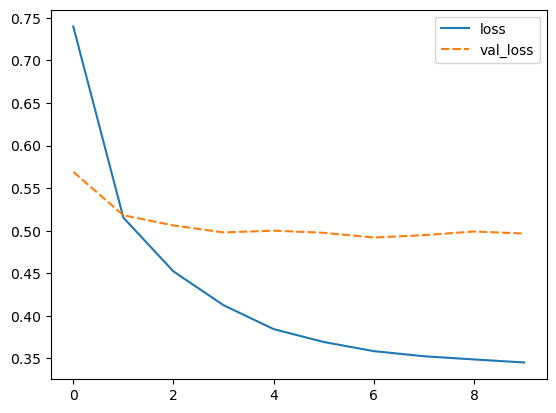

In [260]:
%matplotlib inline
import seaborn as sns
history = pd.DataFrame(hist2.history)
# history = pd.concat([history, pd.DataFrame(hist2.history)])
sns.lineplot(history.reset_index(drop=True))

In [255]:
model.save_weights("try_again.keras")